In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def MK(n):
    x = np.linspace(0,1,n)
    h = x[1]-x[0]
    
    M = np.zeros((n,n),dtype=float)
    K = np.zeros((n,n),dtype=float)
    
    
    M[0,0:2] = np.array([2,1])
    M[-1,:] = M[0,::-1]
    
    K[0,0:2] = np.array([1,-1])
    K[-1,:] = K[0,::-1]
    
    for i in range(1,n-1):
        M[i,i-1:i+2] = np.array([1,4,1])
        K[i,i-1:i+2] = np.array([-1,2,-1])
    
    return (h/6)*M , (1/h)*K 

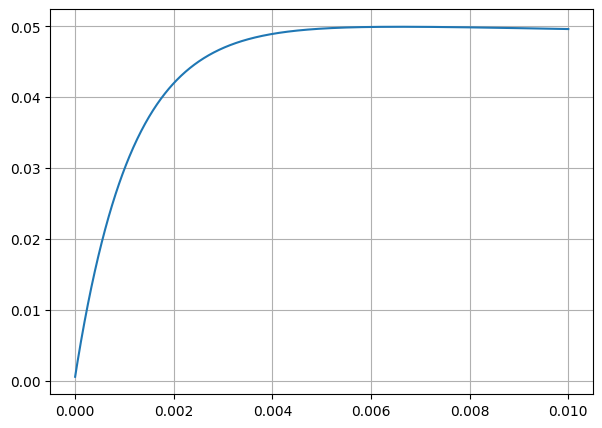

In [ ]:
pi = np.pi
steps = [1001]
dt = 0.00001
T = 0.01



solutions = []
errors_phi = []
time = []
# time loop
for n in steps:
    
    mu_e = 0
    phi_e = 0 
    sigma_e = 0
    
    M, K = MK(n)
    x = np.linspace(0,1,n)
    t= 0
    phi_0 = np.exp(-t)*np.cos(pi*x)
    r = -0.025

    while t <= T:
        #  define exact solutions
        phi_e = np.exp(-t)*np.cos(pi*x)
        mu_e = phi_e**3 + (r+1-(2*pi**2) + pi**4)*phi_e
        sigma_e = -1*pi**2 * phi_e
        grad_phi = -pi*np.exp(-t)*np.sin(pi*x)
        # define rhs
        mu_f = M@(2*(phi_0**3))
        z = np.zeros(n)
        f = phi_e*(3*pi*phi_e**2 + (r+1)*pi**2 - 2*pi**4 + pi**6 -1 -6*(grad_phi)**2)
        F = M@f + (1/dt)*(M@phi_0)
        
        RHS = np.hstack((mu_f,F,z))
        
        # Assembling 3*3 matrix, A
        
        A_11 = M
        A_12 = -(r+1)*M - 3*(phi_0)**2*M + 2*K
        A_13 = K
        A_21 = K
        A_22 = (1/dt)*M
        A_23 = M*0
        A_31 = M*0
        A_32 = K
        A_33 = M
        
        A = np.block([[A_11,A_12,A_13],
                    [A_21,A_22,A_23],
                    [A_31,A_32,A_33]])
        
        direct_solve = np.linalg.solve(A,RHS)
        
        mu_solve = direct_solve[:n]
        phi_solve = direct_solve[n:2*n]
        sigma_solve = direct_solve[2*n:]
        
        phi_0 = phi_solve
        e_phi = np.linalg.norm(phi_solve - phi_e, ord=np.inf)
        errors_phi.append(e_phi)
        time.append(t)
        
        t += dt
        
    # compute error
    
    # print(e)
    # solutions.append((x, phi_solve, phi_e,mu_solve,mu_e,sigma_solve,sigma_e))


# i = 0
# for x, phi_solve,phi_e,mu_solve,mu_e,sigma_solve,sigma_e in solutions:
    

#     # plot solution
#     plt.figure(figsize=(7,5))
#     plt.plot(x,phi_e, 'k--', label="phi_exact")
#     plt.plot(x,phi_solve, 'r--', label="phi_num")
#     plt.title(f'phi(x) Solution at T={T}, n={steps[i]}')
#     plt.xlabel("x")
#     plt.ylabel("phi(x,T)")
#     plt.grid(True)
#     plt.show()
#     i+=1

plt.figure(figsize=(7,5))
plt.plot(time,errors_phi)
plt.grid(True)
plt.show()Ÿ
